# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

data = datasets.load_wine()
wine = data.data

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize features
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine)

# Create k-mean object
n_clusters = 8
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(wine_std)

In [4]:
from sklearn.metrics import silhouette_score

preds = model.fit_predict(wine_std)
centers = model.cluster_centers_

score = silhouette_score (wine_std, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")


For n_clusters = 8, silhouette score is 0.15777035021428829)


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
model = cluster.fit(wine_std)

In [6]:
preds = model.fit_predict(wine_std)
centers = model.cluster_centers_
score = silhouette_score (wine_std, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

For n_clusters = 5, silhouette score is 0.22964640104552184)


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:
n_clusters = 3
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
model = cluster.fit(wine_std)

preds = model.fit_predict(wine_std)
centers = model.cluster_centers_
score = silhouette_score (wine_std, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

For n_clusters = 3, silhouette score is 0.28485891918989864)


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

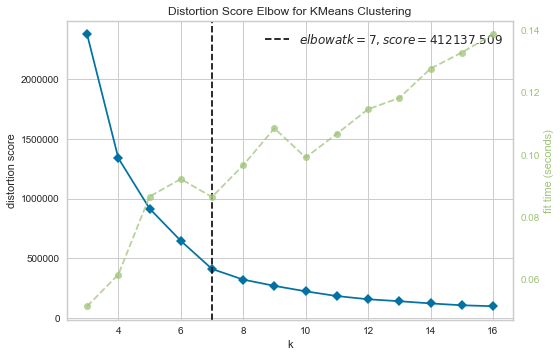

In [8]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17)) #the x-value on the elbow (point of bending of curve) is the best clustering
visualizer.fit(wine) #should I use wine_std? if no, why not?
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

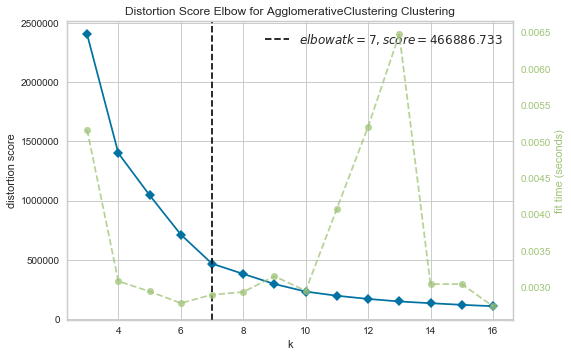

In [24]:
from sklearn.cluster import AgglomerativeClustering

model_agg = AgglomerativeClustering()
visualizer = KElbowVisualizer(model_agg, k=(3,17)) #the x-value on the elbow (point of bending of curve) is the best clustering
visualizer.fit(wine) #should I use wine_std? if no, why not?
visualizer.poof()

In [29]:
n_clusters=3
model_agg = AgglomerativeClustering(n_clusters)

preds = model_agg.fit_predict(wine_std)
#centers = model_agg.cluster_centers_
score = silhouette_score (wine_std, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")
'''
it seems from the silhouette score that 3 clusters is the best. but the elbow plot tell us that is 7...
How to explain this?
'''

For n_clusters = 3, silhouette score is 0.2774439826952266)


'\nit seems from the silhouette score that 3 clusters is the best. but the elbow plot tell us that is 7...\nHow to explain this?\n'

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [26]:
n_clusters = 3
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
model = cluster.fit(wine_std)

In [ ]:
preds = cluster.fit_predict(wine_std)
centers = cluster.cluster_centers_

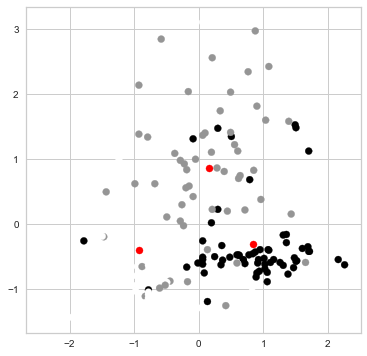

In [27]:
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(wine_std[:, 0], wine_std[:, 1], c=preds)

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)#, alpha=0.75)

plt.show() #red dots are centroids

In [ ]:
'''
Here I end up using the first kmean model (better silhouette score). for plotting i needed the centers
But what I wanted to use the agglomerative cluster? It doesn't have the attribute 'cluster_centers_'
'''

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [36]:
from sklearn.decomposition import PCA, FastICA

pca = PCA(n_components=0.99, whiten=True)
wine_pca = pca.fit_transform(wine_std)

In [37]:
print("Original number of features:", wine_std.shape[1])
print("Reduced number of features:", wine_pca.shape[1])

Original number of features: 13
Reduced number of features: 12


Text(0, 0.5, 'PCA 2')

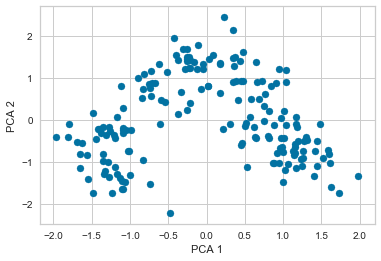

In [40]:
#pca_X = pca.transform(X)

plt.scatter(wine_pca[:, 0], wine_pca[:, 1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2") #is this correct? Should I be able to distinguish clusters? if so, how many?

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.